# National League forecasting

This is the main notebook for simulating the National League 2023/24 season using Monte Carlo simulations.

### Import necessary modules

In [1]:
# Append "../src/" to the system path to include relevant modules
import sys
sys.path.append("../src/")

# Import the 'create_dataset' function for loading training data
from utils import create_dataset

# Import the Model class training a regression model
from model import Model

# Import the DataFetcher class for retrieving this seasons data
from data_fetcher import DataFetcher

# Most functionality to simulate a season is here
from simulate import Season, summarise_forecasts, plot_simulated_points_distribution


### Train a regression model
This model will be used to predict scores for each team based on their Elo ratings. It is trained on previous World Cup matches from 1990 - 2018.

In [2]:
# Instantiate an object of the Model class
model = Model()

# Call the create_dataset() function to generate the features (X) and labels (y) for training the model
X, y = create_dataset()

# Fit the multi-output regression model using the generated datasets (X, y)
model.fit_model(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Set up the current season
Use the [Api-Football](https://www.api-football.com) API to get information from the current season, and load initial Elo ratings for the start of the season.

In [3]:
# Create an instance of the DataFetcher class, specifying league ID 43 (National League) and the 2023 season
data_fetcher = DataFetcher(league=43, season=2023)

# Create an instance of the Season class, providing it with the initial Elos, a DataFetcher instance, and the model
season = Season(elo_csv_path="../data/init_elo.csv", data_fetcher=data_fetcher, model=model)

### Simulate!
This cell simulates the remainder of the season as many times as specified.

In [8]:
# Set the number of simulations
simulations=100

# Simulate the remainder of the season
all_simulated_dfs = season.simulate_season(simulations=simulations)

### Get forecasted probabilities
Using the simulated league seasons, this function calculates the probability of each team winning the title, reaching the play offs (at a minimum), and getting relegated. Additionally, the average numbers of points, goals scored, goals conceded, and final Elo rating are shown.

In [ ]:
# Generate a summary DataFrame using the 'summarise_forecasts' function
summary_df = summarise_forecasts(all_simulated_dfs)

# Display the summary DataFrame
summary_df

,Points,GF,GA,ELO,GD,Title,Top 7,Relegated
Team,,,,,,,,
Chesterfield,77.39,74.68,56.85,1492.521621,17.83,37.0,86.0,1.0
Barnet,75.59,68.09,51.84,1463.783041,16.25,28.0,82.0,0.0
Solihull Moors,71.07,63.83,53.58,1454.646761,10.25,5.0,66.0,2.0
FC Halifax Town,69.79,58.97,50.56,1459.557663,8.41,6.0,58.0,1.0
Woking,68.01,61.59,53.51,1464.824684,8.08,3.0,48.0,5.0
Hartlepool,67.64,65.54,64.11,1436.837621,1.43,3.0,44.0,4.0
Bromley,66.21,60.12,56.74,1448.652526,3.38,1.0,38.0,7.0
Gateshead,65.92,69.25,59.07,1444.693577,10.18,2.0,41.0,5.0
Rochdale,64.73,58.55,55.20,1441.219283,3.35,4.0,33.0,11.0


### Plot distributions
This visualises the distribution of points for each team across all simulated seasons

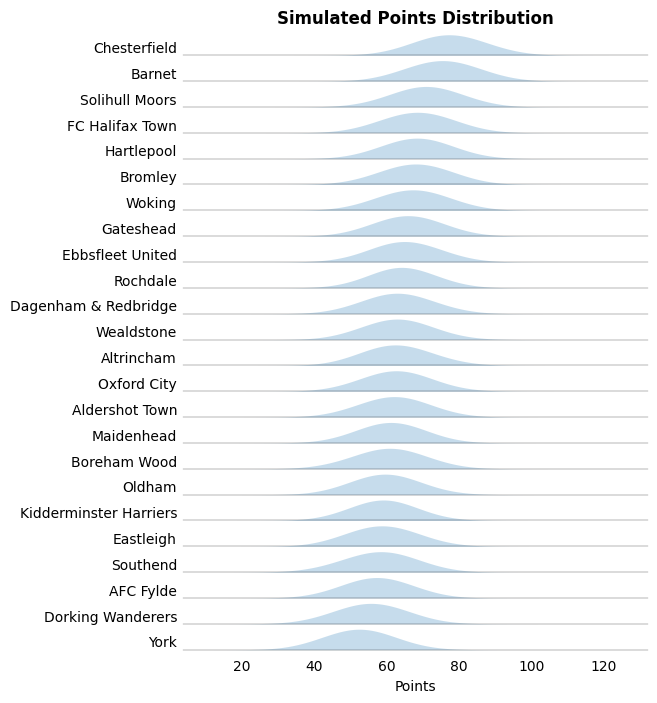

In [21]:
# Generate a plot showing the points distribution across simulations for each team, and save to specified path
plot_simulated_points_distribution(all_simulated_dfs, save_path="../images/national_league.png")